## **Index:**
- Please ensure R is installed on your machine and packages for Robyn have been installed
- [Import necessary python packages](#import-python-packages)
- Environment Setup:
    - [Setting up environment on WINDOWS machine](#Setting-up-environment-on-WINDOWS-machine)
    - [Setting up environment on LINUX machine](#Setting-up-environment-on-LINUX-machine)
    - [Setting up environment on MAC](#Setting-up-environment-on-MAC)
- Demo Script
    - Provision API
    - Get Data
    - Robyn Inputs
    - Robyn Run
    - Robyn Outputs

#### Import necessary python packages <a class="anchor" id="import-python-packages"></a>

In [2]:
import pandas as pd
import json
import requests
import json
import datetime as dt
import binascii
import io
import pandas as pd
import os
import sys
import subprocess
from urllib.request import urlopen
from bs4 import BeautifulSoup
from PIL import Image
from IPython.display import display

import pprint
from PIL import Image
Image.MAX_IMAGE_PIXELS = 2**30

#### Setting up environment on WINDOWS machine <a class="anchor" id="Setting-up-environment-on-WINDOWS-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! START "" /B "<path_where_R_is_installed>\Rscript.exe" "<path_where_robyn_api_files_exist>\api_call.R" </font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    e.g. ! START "" /B "C:\Program Files\R\R-4.2.2\bin\Rscript.exe" "C:\Documents\GitHub\robyn\robyn_api\api_call.R"

In [49]:
! START "" /B "C:/Program Files/R/R-4.2.2/bin/Rscript.exe" "C:/Users/ebyjose/OneDrive - Facebook/Documents/GitHub/robyn/robyn_api/api_call.R" 1>C:/Users/ebyjose/Robynlog.txt 2>&1

In [50]:
#to find the endpoint running plumber
! netstat -aon | find /i "listening" |find "9999"

  TCP    127.0.0.1:9999         0.0.0.0:0              LISTENING       11220


In [25]:
# RscriptPath = "C:/Program Files/R/R-4.2.2/bin/Rscript.exe"
# apiFilePath = "C:/Users/ebyjose/OneDrive - Facebook/Documents/GitHub/robyn/robyn_api/api_call.R"
# logFilePath = "C:/Users/ebyjose/Robynlog.txt"

# # currPath = os.getcwd()
# # currPath = currPath.replace('\\','/')
# # logFilePath ='"'+ "1> "+ '"' + currPath+"/log.txt"+ '"' +" 2>&1" + '"'

# # p = subprocess.Popen([RscriptPath, apiFilePath, "1> C:/log.txt 2>&1"])
# p = subprocess.call(["START", "/B", RscriptPath, apiFilePath, "1>", logFilePath , "2>&1" ])

In [52]:
# to close the API in windows
endpoint = 11220
subprocess.call(['taskkill', '/F', '/T', '/PID',  str(endpoint)])

0

In [44]:
requests.post(apiBaseUrl.format('exit'),data=payload)

<Response [500]>

#### Steps to run RobynAPI if you are using a <u> LINUX </u> machine/server <a class="anchor" id="Setting-up-environment-on-LINUX-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! Rscript <path_where_robyn_api_files_exist>\api_call.R &</font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    
    e.g. # ! Rscript /home/robyn/robyn_api/api-call.R

In [ ]:
! Rscript <path_to_apifile>/api_call.R &

#### Steps to run RobynAPI if you are using a <u> MAC </u> <a class="anchor" id="Setting-up-environment-on-MAC"></a>

#### Barebones command to run RobynAPI -> <font color='red'> subprocess.Popen(["Rscript", "<path_to_apifile>/api_call.R"])</font>
1. Find where api files exist and replace it with <path_to_apifile>
    
    e.g. # subprocess.Popen(["Rscript", "/home/robyn/robyn_api/api_call.R"])

In [3]:
p = subprocess.Popen(["Rscript", "./api_call.R"])

Running plumber API at http://127.0.0.1:9999
Running swagger Docs at http://127.0.0.1:9999/__docs__/


In [4]:
# p.kill()
# p = subprocess.Popen(["Rscript", "./api_call.R"])

## Demo file

In [5]:
apiBaseUrl = "http://127.0.0.1:9999/{}"
url = apiBaseUrl[:-3]+"/openapi.json"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
apis = json.loads(soup.contents[0])
for i in apis['paths'].keys():
    print(apiBaseUrl.format(i[1:]))

http://127.0.0.1:9999/dt_simulated_weekly
http://127.0.0.1:9999/dt_prophet_holidays
http://127.0.0.1:9999/robyn_inputs
http://127.0.0.1:9999/robyn_run
http://127.0.0.1:9999/robyn_outputs
http://127.0.0.1:9999/robyn_onepagers
http://127.0.0.1:9999/robyn_allocator
http://127.0.0.1:9999/robyn_write
http://127.0.0.1:9999/robyn_recreate
http://127.0.0.1:9999/hyper_names


# Define Functions

In [6]:
hexToPng = lambda fileName, hexData: Image.open(io.BytesIO(binascii.unhexlify(hexData))).save(fileName, "png")
dateConv = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').date()

In [7]:
def asSerialisedFeather(modelData):
    modelDataFeather = io.BytesIO()
    pd.DataFrame(modelData).to_feather(modelDataFeather)
    modelDataFeather.seek(0)
    modelDataBinary = modelDataFeather.read()
    return binascii.hexlify(modelDataBinary).decode()

In [8]:
# set image size
max_size = (1000,1500)

# Get Data

In [9]:
# Get the sample dataset from Robyn api for use in later steps
response = requests.post(apiBaseUrl.format('dt_simulated_weekly'))
respJson = json.loads(response.content.decode('utf-8'))
dtSimulatedWeekly = [{'DATE' : dateConv(rec['DATE']),**{col:rec[col]for col in rec if col!='DATE'}} for rec in respJson]
dtSimulatedWeeklyDf = pd.DataFrame(dtSimulatedWeekly)

In [10]:
dtSimulatedWeeklyDf.head()

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,67075.04,0.0,38185.4667,7.290385e+07,0.0000,0,8125009,22821.3987,na,19401.6538
1,2015-11-30,2.584277e+06,85840.36,0.0,0.0000,1.658110e+07,29511.7155,12400,7901549,3425.8574,na,14791.0000
2,2015-12-07,2.547387e+06,0.00,396835.2,1361.6000,4.995477e+07,36132.3590,11360,8300197,12769.1261,na,14544.0000
3,2015-12-14,2.875220e+06,250350.92,0.0,53040.0000,3.164930e+07,36804.2110,12760,8122883,8401.4720,na,2800.0000
4,2015-12-21,2.215953e+06,0.00,832008.0,0.0000,8.802269e+06,28401.7441,10840,7105985,2068.7478,na,15478.0000


In [11]:
# Get the sample dataset from Robyn api for use in later steps
response = requests.post(apiBaseUrl.format('dt_prophet_holidays'))
respJson = json.loads(response.content.decode('utf-8'))
dt_prophet_holidays = pd.DataFrame(respJson)
dt_prophet_holidays.head()

,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


# Robyn Input

## Step 2a: For first time user: Model specification in 4 steps
### 2a-1: First, specify input variables
    All sign control are now automatically provided: "positive" for media & organic
    variables and "default" for all others. User can still customise signs if necessary.
    Documentation is available, access it anytime by running: ?robyn_inputs

In [12]:
inputArgs = {
    "date_var": "DATE",
    "dep_var": "revenue",
    "dep_var_type": "revenue",
    "prophet_vars": ["trend", "season", "holiday"],
    "prophet_country": "DE",
    "context_vars" : ["competitor_sales_B", "events"],
    "paid_media_spends": ["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    "paid_media_vars": ["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
    "organic_vars" : "newsletter",
    "window_start": "2016-01-01",
    "window_end": "2018-12-31",
    "adstock": "geometric"
}

In [13]:
# Build the payload for the robyn_inputs()
payload = {
    'modelData' : asSerialisedFeather(dtSimulatedWeeklyDf), 
    'holidayData' : asSerialisedFeather(dt_prophet_holidays), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [14]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

Automatically set these variables as 'factor_vars': 'events'
Input 'window_start' is adapted to the closest date contained in input data: 2016-01-04


## 2a-2: Second, define and add hyperparameters
    Default media variable for modelling has changed from paid_media_vars to paid_media_spends.
    Also, calibration_input are required to be spend names.
    hyperparameter names are based on paid_media_spends names too. See right hyperparameter names:

In [15]:
payload = {
    'adstock' : InputCollect['adstock'], 
    'all_media' : json.dumps(InputCollect['all_media'])
}

In [16]:
# Get response
response = requests.post(apiBaseUrl.format('hyper_names'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
hyper_names = respJson

In [17]:
hyper_names

['facebook_S_alphas',
 'facebook_S_gammas',
 'facebook_S_thetas',
 'newsletter_alphas',
 'newsletter_gammas',
 'newsletter_thetas',
 'ooh_S_alphas',
 'ooh_S_gammas',
 'ooh_S_thetas',
 'print_S_alphas',
 'print_S_gammas',
 'print_S_thetas',
 'search_S_alphas',
 'search_S_gammas',
 'search_S_thetas',
 'tv_S_alphas',
 'tv_S_gammas',
 'tv_S_thetas']

In [18]:
# Example hyperparameters ranges for Geometric adstock
inputArgs = {
    "hyperparameters" : {
        "facebook_S_alphas" : [0.5, 3],
        "facebook_S_gammas" : [0.3, 1],
        "facebook_S_thetas" : [0, 0.3],
        "print_S_alphas" : [0.5, 3],
        "print_S_gammas" : [0.3, 1],
        "print_S_thetas" : [0.1, 0.4],
        "tv_S_alphas" : [0.5, 3],
        "tv_S_gammas" : [0.3, 1],
        "tv_S_thetas" : [0.3, 0.8],
        "search_S_alphas" : [0.5, 3],
        "search_S_gammas" : [0.3, 1],
        "search_S_thetas" : [0, 0.3],
        "ooh_S_alphas" : [0.5, 3],
        "ooh_S_gammas" : [0.3, 1],
        "ooh_S_thetas" : [0.1, 0.4],
        "newsletter_alphas" : [0.5, 3],
        "newsletter_gammas" : [0.3, 1],
        "newsletter_thetas" : [0.1, 0.4],
        "train_size": [0.5, 0.8]
    }
}

## 2a-3: Third, add hyperparameters into robyn_inputs()

In [19]:
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [20]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

>> Running feature engineering...


## 2a-4: Fourth (optional), model calibration / add experimental input

In [21]:
# calibration_input = {
#     # channel name must in paid_media_vars
#     "channel": ["facebook_S","tv_S","facebook_S+search_S","newsletter"],
#     # liftStartDate must be within input data range
#     "liftStartDate" : ["2018-05-01","2018-04-03","2018-07-01","2017-12-01"],
#     # liftEndDate must be within input data range
#     "liftEndDate" : ["2018-06-10","2018-06-03","2018-07-20","2017-12-31"],
#     # Provided value must be tested on same campaign level in model and same metric as dep_var_type
#     "liftAbs" : [400000, 300000, 700000, 200],
#     # Spend within experiment: should match within a 10% error your spend on date range for each channel from dt_input
#     "spend" : [421000, 7100, 350000, 0],
#     # Confidence: if frequentist experiment, you may use 1 - pvalue
#     "confidence" : [0.85, 0.8, 0.99, 0.95],
#     # KPI measured: must match your dep_var
#     "metric" : ["revenue","revenue","revenue","revenue"],
#     # Either "immediate" or "total". For experimental inputs like Facebook Lift, "immediate" is recommended.
#     "calibration_scope" : ["immediate","immediate","immediate","immediate"]
# }
# calibration_input = pd.DataFrame(calibration_input)
# calibration_input

In [22]:
# payload = {
#     'InputCollect' : json.dumps(InputCollect), 
#     'calibration_input' : asSerialisedFeather(calibration_input), 
# }

In [23]:
# # Get response
# response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
# respJson = json.loads(response.content.decode('utf-8'))
# InputCollect = respJson

### Check spend exposure fit if available


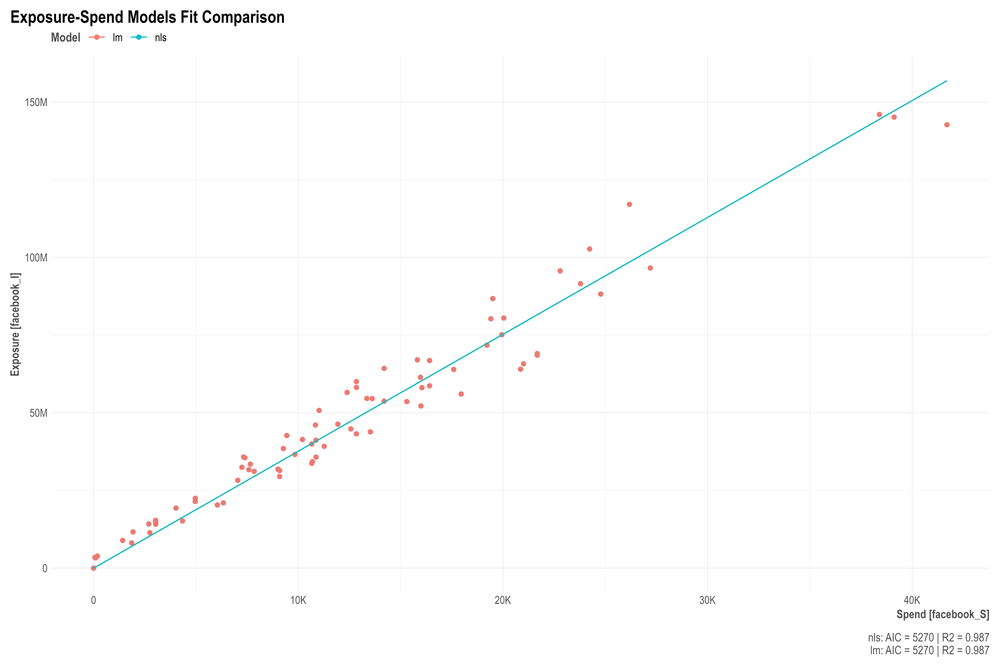

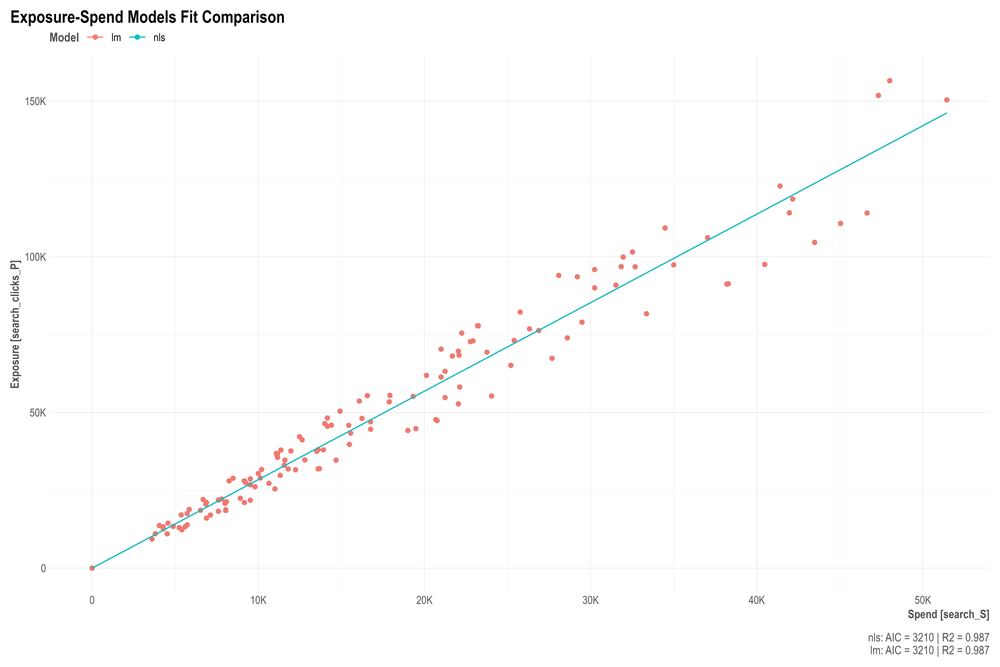

In [24]:
if len(InputCollect['exposure_vars']) > 0:
    for i in InputCollect['exposure_vars']:
        image_data = binascii.unhexlify("".join(InputCollect['modNLS']['plots'][i]))
        image = Image.open(io.BytesIO(image_data))
        image.thumbnail(max_size, Image.ANTIALIAS)
        display(image)

# Robyn Run

In [25]:
runArgs = {
    "iterations" : 800,
    "trials" : 3, 
    "ts_validation" : True,
    "add_penalty_factor" : False,
    "seed" : 123
}

In [26]:
# Build the payload for the robyn run
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonRunArgs' : json.dumps(runArgs)
}

In [27]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_run'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputModels = respJson

Warning in check_iteration(InputCollect$calibration_input, iterations, trials,  :
  We recommend to run at least 2000 iterations per trial and 5 trials to build initial model
Input data has 208 weeks in total: 2015-11-23 to 2019-11-11
Initial model is built on rolling window of 157 week: 2016-01-04 to 2018-12-31
Time-series validation with train_size range of 50%-80% of the data...
Using geometric adstocking with 20 hyperparameters (20 to iterate + 0 fixed) on 9 cores
>>> Starting 3 trials with 800 iterations each using TwoPointsDE nevergrad algorithm...
  Running trial 1 of 3


  |===================================================================== |  99%
  Finished in 0.34 mins
  |                                                                      |   0%

  Running trial 2 of 3


  |===================================================================== |  99%
  Finished in 0.34 mins
  |                                                                      |   0%

  Running trial 3 of 3


  |===================================================================== |  99%
  Finished in 0.35 mins


- DECOMP.RSSD NOT converged: sd@qt.20 0.078 > 0.051 & |med@qt.20| 0.51 <= 0.63
- NRMSE converged: sd@qt.20 0.037 <= 0.063 & |med@qt.20| 0.13 <= 0.14
Total run time: 1.09 mins
Picking joint bandwidth of 0.0246
Picking joint bandwidth of 0.0162


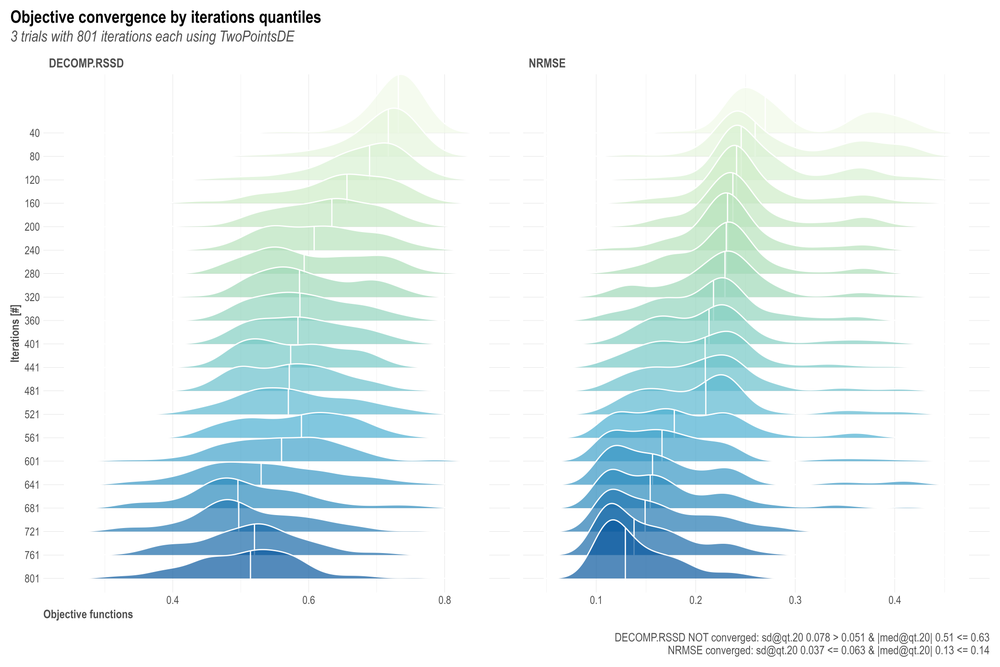

In [28]:
image_data = binascii.unhexlify("".join(OutputModels['convergence']['moo_distrb_plot']))
image = Image.open(io.BytesIO(image_data))
image.thumbnail(max_size, Image.ANTIALIAS)
display(image)

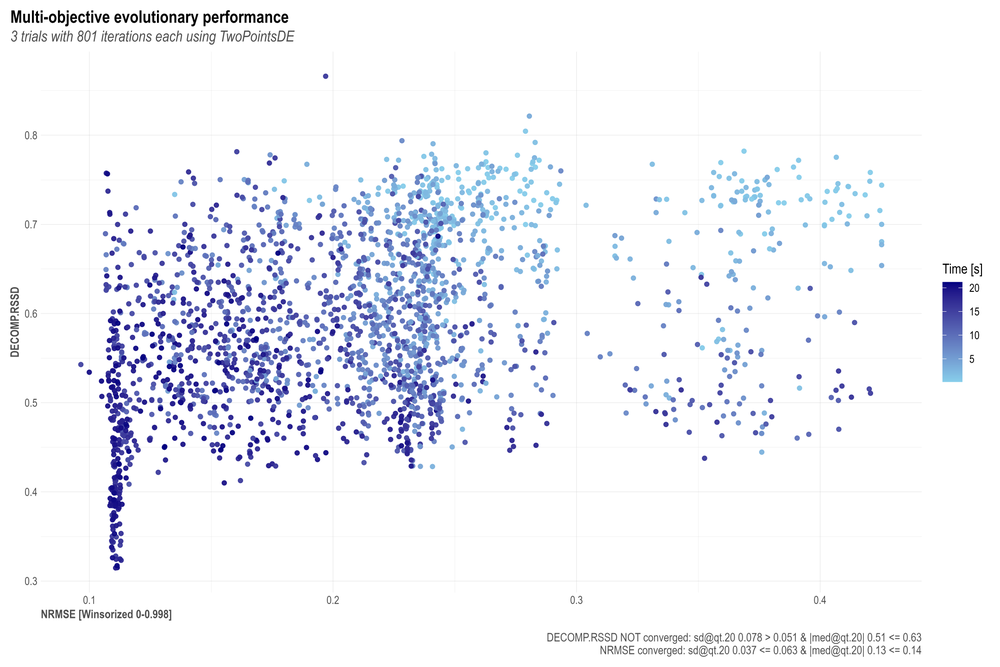

In [29]:
image_data = binascii.unhexlify("".join(OutputModels['convergence']['moo_cloud_plot']))
image = Image.open(io.BytesIO(image_data))
image.thumbnail(max_size, Image.ANTIALIAS)
display(image)

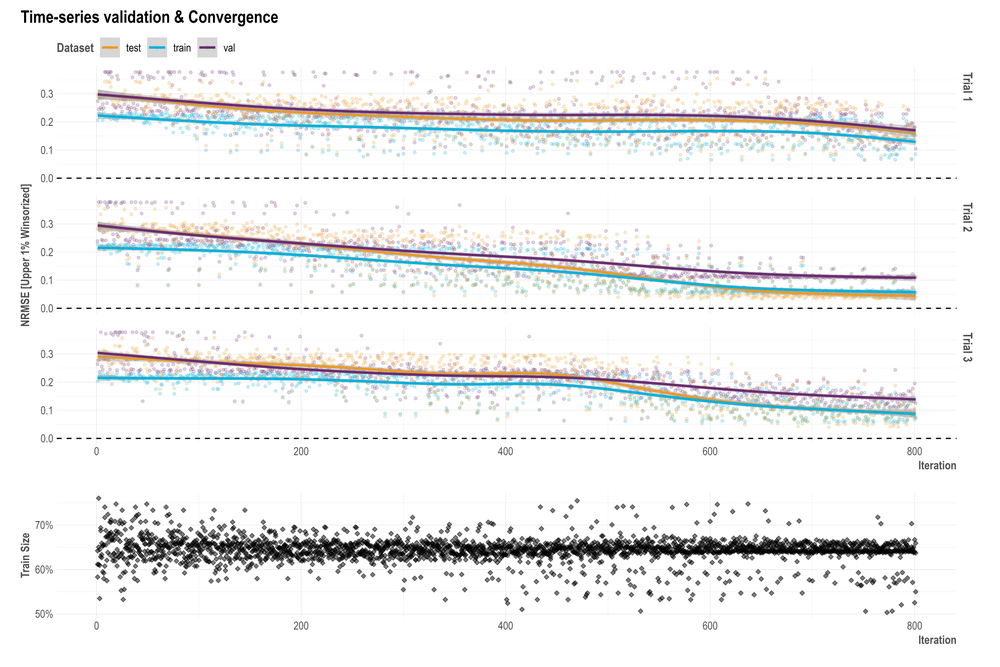

In [30]:
if OutputModels['ts_validation_plot']:
    image_data = binascii.unhexlify("".join(OutputModels['ts_validation_plot']))
    image = Image.open(io.BytesIO(image_data))
    image.thumbnail(max_size, Image.ANTIALIAS)
    display(image)

# Robyn Outputs

In [57]:
create_files = True
robyn_directory = '~/Desktop'

In [58]:
outputsArgs = {
    "pareto_fronts" : 'auto', # automatically pick how many pareto-fronts to fill min_candidates (100)
#     "min_candidates" : 10, # top pareto models for clustering. Default to 100
#     "calibration_constraint" : 0.1, # range c(0.01, 0.1) & default at 0.1
    "csv_out" : "pareto", # "pareto", "all", or NULL (for none)
    "clusters" : True, # Set to TRUE to cluster similar models by ROAS. See ?robyn_clusters
    "export" : create_files, # this will create files locally
    "plot_folder" : robyn_directory, # path for plots exports and files creation
#     "plot_pareto" : create_files # Set to FALSE to deactivate plotting and saving model one-pagers
}

In [59]:
# Build the payload for the robyn_outputs()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputModels' : json.dumps(OutputModels),
    'jsonOutputsArgs' : json.dumps(outputsArgs)
}

In [60]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_outputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputCollect = respJson

>>> Running Pareto calculations for 2400 models on auto fronts...
>> Automatically selected 12 Pareto-fronts to contain at least 100 pareto-optimal models (101)
>>> Calculating response curves for all models' media variables (505)...
>> Pareto-Front: 1 [10 models]


 00:00:01 [=========================================] 100% | 10                      


>> Pareto-Front: 2 [17 models]


 00:00:01 [=========================================] 100% | 17                      
 00:00:00 [======                                   ] 12.5% | 1                      

>> Pareto-Front: 3 [8 models]


 00:00:01 [=========================================] 100% | 8                       
 00:00:00 [=========                                ] 20% | 2                      

>> Pareto-Front: 4 [10 models]


 00:00:01 [=========================================] 100% | 10                      
 00:00:00 [=====                                    ] 10% | 1                      

>> Pareto-Front: 5 [10 models]


 00:00:01 [=========================================] 100% | 10                      


>> Pareto-Front: 6 [8 models]


 00:00:01 [=========================================] 100% | 8                       
 00:00:00 [=========                                ] 20% | 1                      

>> Pareto-Front: 7 [5 models]


 00:00:00 [=========================================] 100% | 5                       
 00:00:00 [============                             ] 28.6% | 2                      

>> Pareto-Front: 8 [7 models]


 00:00:01 [=========================================] 100% | 7                       
 00:00:00 [=======                                  ] 16.7% | 1                      

>> Pareto-Front: 9 [6 models]


 00:00:00 [=========================================] 100% | 6                       
 00:00:00 [======                                   ] 14.3% | 1                      

>> Pareto-Front: 10 [7 models]


 00:00:01 [=========================================] 100% | 7                       


>> Pareto-Front: 11 [6 models]


 00:00:00 [=========================================] 100% | 6                       


>> Pareto-Front: 12 [7 models]


 00:00:01 [=========================================] 100% | 7                       


Creating directory for outputs: /Users/yuyatanaka/Desktop/Robyn_202311032340_init/
>>> Calculating clusters for model selection using Pareto fronts...
>> Auto selected k = 17 (clusters) based on minimum WSS variance of 5%
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in confidence_calcs(xDecompAgg, cls, all_paid, dep_var_type,

  |======================================================================| 100%


>> Exported model inputs as /Users/yuyatanaka/Desktop/Robyn_202311032340_init/RobynModel-inputs.json
Picking joint bandwidth of NaN
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to min; returning Inf
Warning in max(data$x, na.rm = TRUE) :
  no non-missing arguments to max; returning -Inf
Picking joint bandwidth of 0.0189
Picking joint bandwidth of NaN
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to min; returning Inf
Warning in max(data$x, na.rm = TRUE) :
  no non-missing arguments to max; returning -Inf
Picking joint bandwidth of 0.0297
Picking joint bandwidth of NaN
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to min; returning Inf
Warning in max(data$x, na.rm = TRUE) :
  no non-missing arguments to max; returning -Inf
Picking joint bandwidth of 0.0211
Picking joint bandwidth of NaN
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to min; returning Inf
Warning in max(data$x, na.rm = TRUE) :
  no non-missin

# Robyn Onepager

In [61]:
for i in OutputCollect['clusters']['models']:
    print(i['solID'])

2_62_2
1_87_1
2_76_2
2_82_5
3_87_2
1_87_4
2_80_9
2_80_7
1_65_5
2_82_1
2_76_5
2_73_5
2_74_5
2_79_2
1_52_2
2_75_8
2_63_3


In [62]:
select_model = '2_76_2'

In [63]:
onepagersArgs = {
    "select_model" : select_model, # automatically pick how many pareto-fronts to fill min_candidates (100)
    "export" : False, # this will create files locally
}

In [64]:
# Build the payload for the robyn_onepagers()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonOnepagersArgs": json.dumps(onepagersArgs),
    'dpi' : 100,
    'width' : 15,
    'height' : 20
}

In [65]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_onepagers'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
onepager = respJson

Exporting charts as: /Users/yuyatanaka/Desktop/Robyn_202311032340_init/2_76_2.png


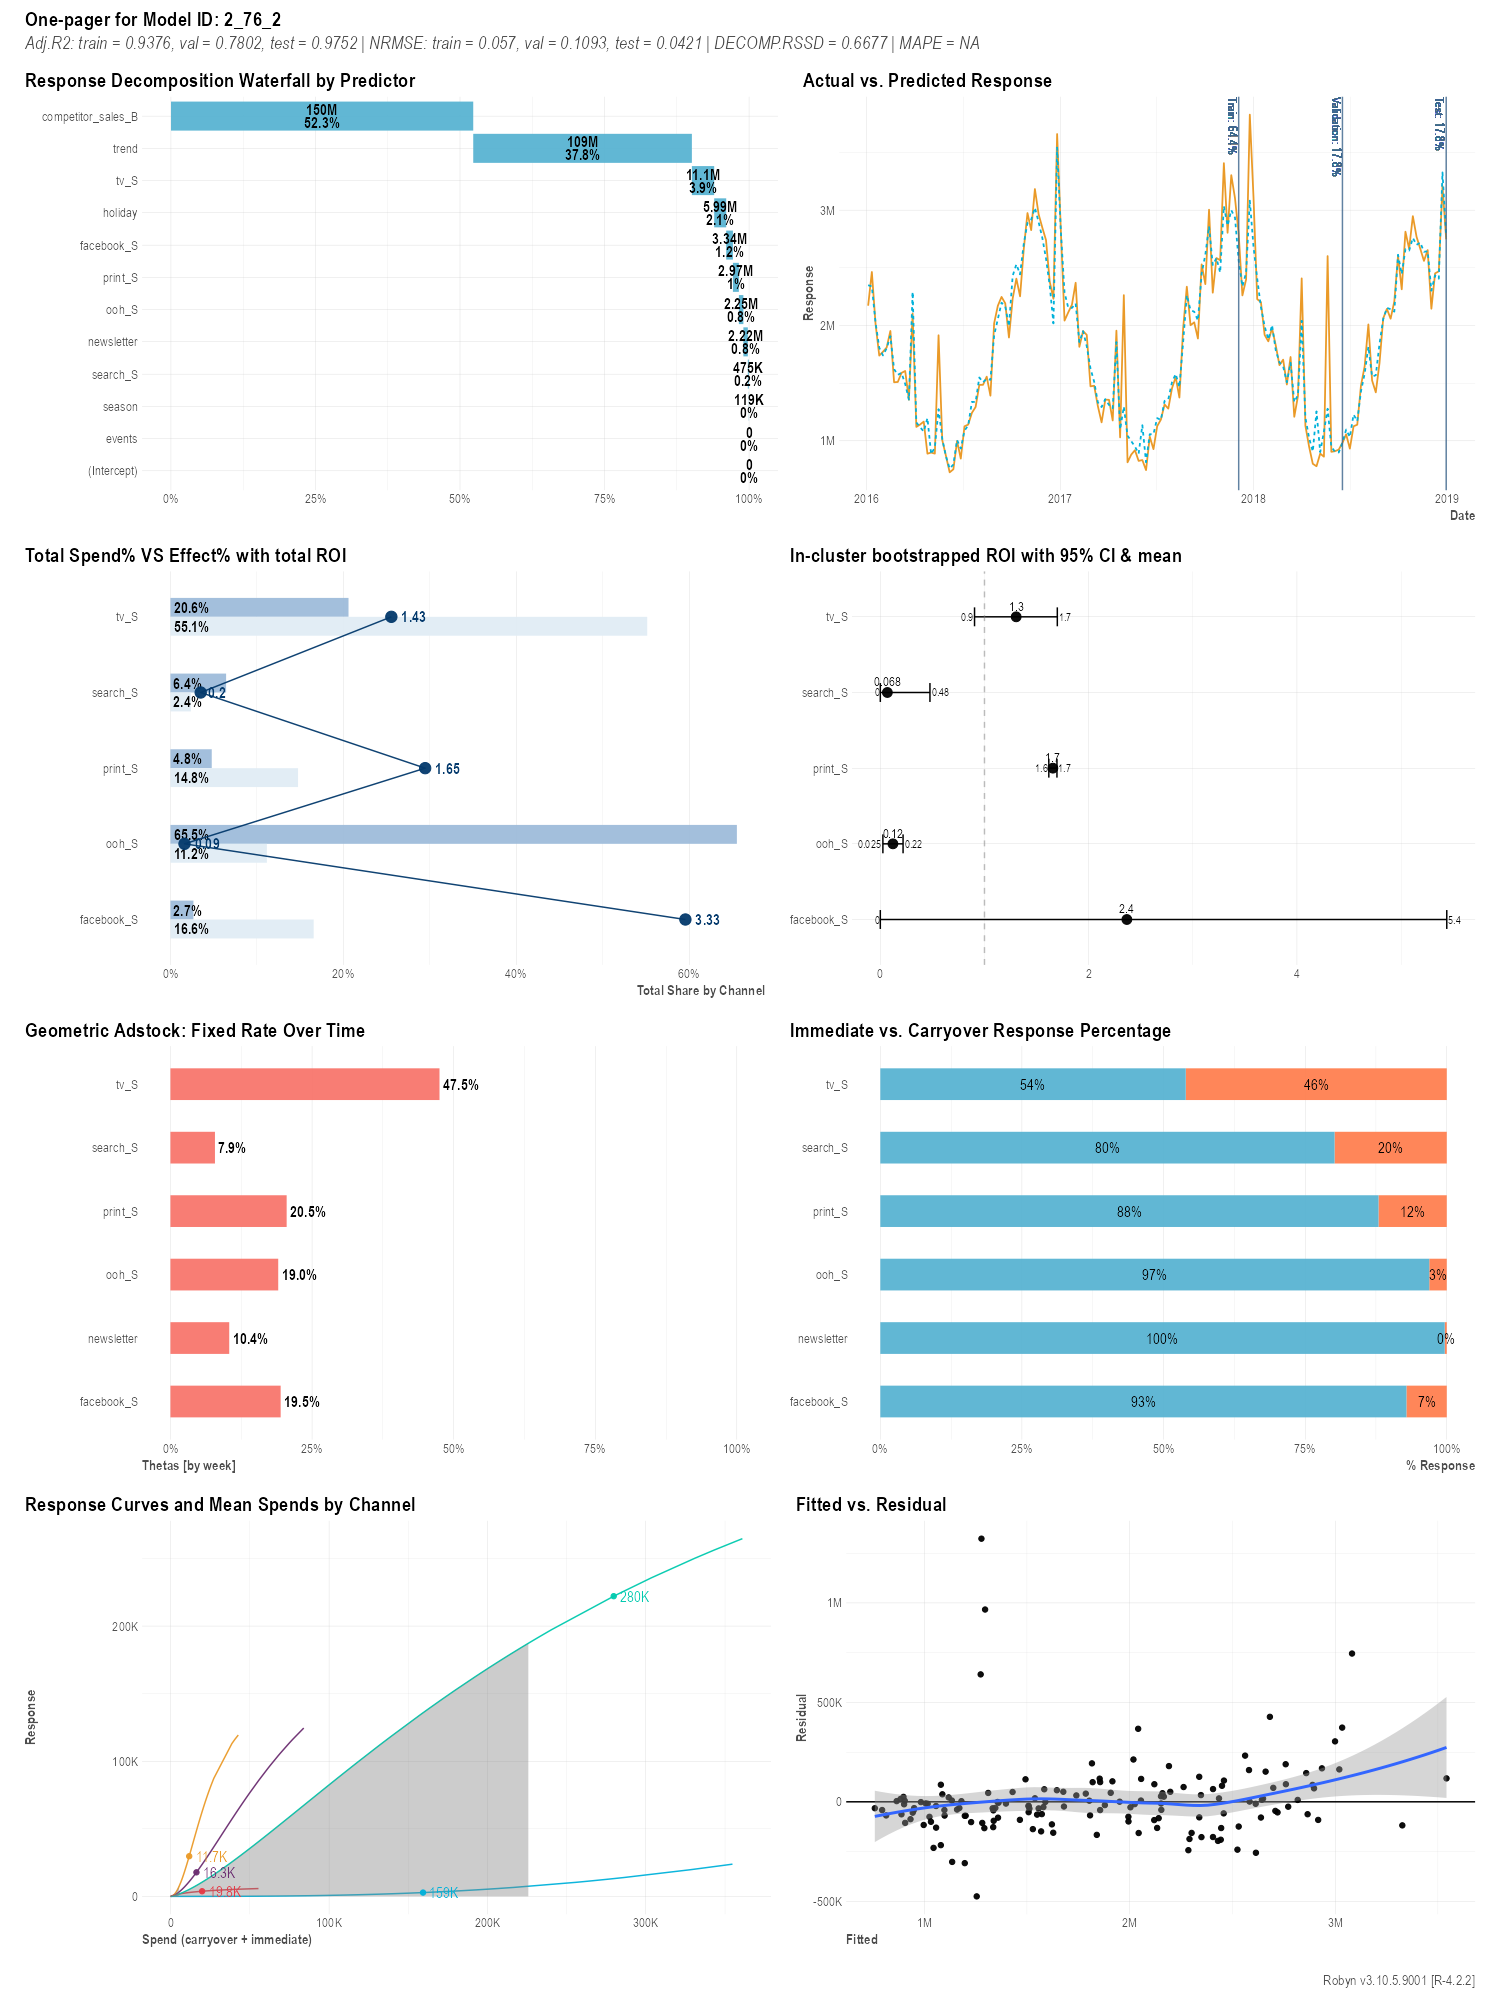

In [66]:
image_data = binascii.unhexlify("".join(onepager))
image = Image.open(io.BytesIO(image_data))
display(image)

# Robyn Allocator

In [67]:
allocatorArgs = {
    "select_model" : select_model,
#     "date_range" : None, # Default last month as initial period
#     "total_budget" : None, # When NULL, default is total spend in date_range
    "channel_constr_low" : 0.7,
    "channel_constr_up" : 1.2,
    "channel_constr_multiplier" : 3,
    "scenario" : "max_response",
    "export" : True,
}

In [68]:
# Build the payload for the robyn_allocator()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonAllocatorArgs": json.dumps(allocatorArgs),
    'dpi' : 100,
    'width' : 15,
    'height' : 15
}

In [69]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_allocator'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
allocator = respJson

>>> Running budget allocator for model ID 2_76_2 ...
Automatically picked date_range = 'last_4'
Date Window: 2018-12-10:2018-12-31 (4 weeks)
Exporting to: /Users/yuyatanaka/Desktop/Robyn_202311032340_init/2_76_2_reallocated_best_roas.png


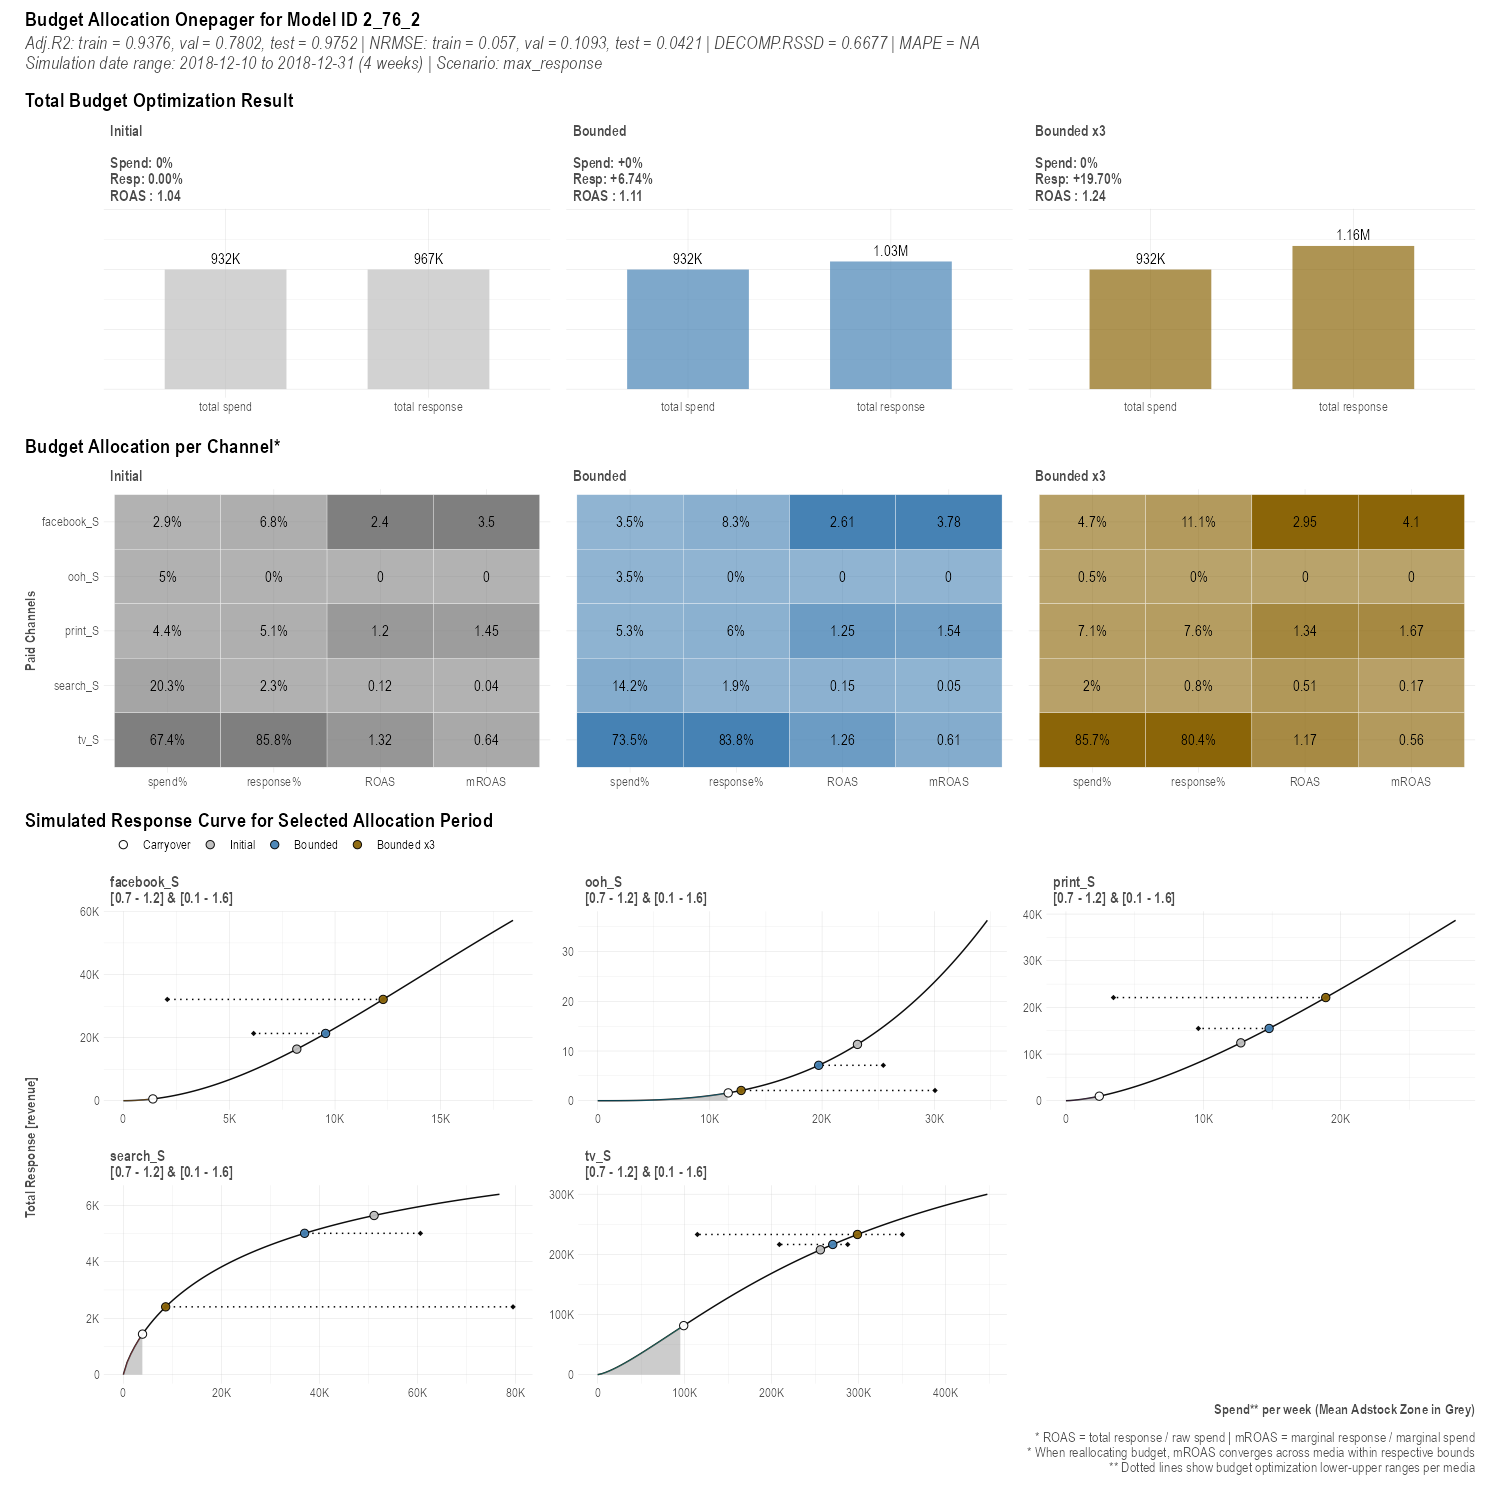

In [70]:
image_data = binascii.unhexlify("".join(allocator))
image = Image.open(io.BytesIO(image_data))
display(image)

# Robyn Write

In [45]:
writeArgs = {
    "select_model" : select_model,
    "dir" : "~/Desktop"
}

In [46]:
# Build the payload for the robyn_write()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    'OutputModels' : json.dumps(OutputModels),
    "jsonWriteArgs": json.dumps(writeArgs)
}

In [47]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_write'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))

>> Exported model 2_76_2 as ~/Desktop/RobynModel-2_76_2.json


# Robyn Recreate

In [48]:
json_path = '~/Desktop/RobynModel-2_76_2.json'

In [49]:
recreateArgs = {
    "json_file" : json_path,
    "quiet" : False
}

In [50]:
# Build the payload for the robyn_recreate()
payload = {
    'dt_input' : asSerialisedFeather(dtSimulatedWeeklyDf), 
    'dt_holidays' : asSerialisedFeather(dt_prophet_holidays), 
    "jsonRecreateArgs": json.dumps(recreateArgs)
}

In [51]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_recreate'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
RobynRecreated = respJson

>>> Recreating model 2_76_2
Imported JSON file successfully: ~/Desktop/RobynModel-2_76_2.json
>> Running feature engineering...
Input data has 208 weeks in total: 2015-11-23 to 2019-11-11
Initial model is built on rolling window of 157 week: 2016-01-04 to 2018-12-31
>>> Calculating response curves for all models' media variables (5)...
Successfully recreated model ID: 2_76_2


In [52]:
RobynRecreated.keys()

dict_keys(['InputCollect', 'OutputCollect'])

In [53]:
RobynRecreated['InputCollect'].keys()

dict_keys(['dt_input', 'dt_holidays', 'dt_mod', 'dt_modRollWind', 'xDecompAggPrev', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'unused_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'hyperparameters', 'calibration_input', 'custom_params', 'dt_inputRollWind', 'modNLS', 'version'])

In [54]:
RobynRecreated['OutputCollect'].keys()

dict_keys(['resultHypParam', 'xDecompAgg', 'mediaVecCollect', 'xDecompVecCollect', 'resultCalibration', 'allSolutions', 'allPareto', 'calibration_constraint', 'OutputModels', 'cores', 'iterations', 'trials', 'intercept_sign', 'nevergrad_algo', 'add_penalty_factor', 'seed', 'UI', 'pareto_fronts', 'hyper_fixed', 'plot_folder', 'hyper_updated', 'selectID'])

In [55]:
RobynRecreated['OutputCollect']['selectID']

['2_76_2']